In [105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV
import seaborn as sns
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_bar, labs, geom_text, geom_label
from plotnine.mapping import after_stat
import plotnine

In [59]:
df = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv', sep=';')

In [3]:
# df = pd.concat([train_df, test_df], ignore_index=True)

### Data Visualization

In [69]:
# Visualize categorical data

# get all the categorical columns
cat_cols = list(df.select_dtypes(include=['object']))

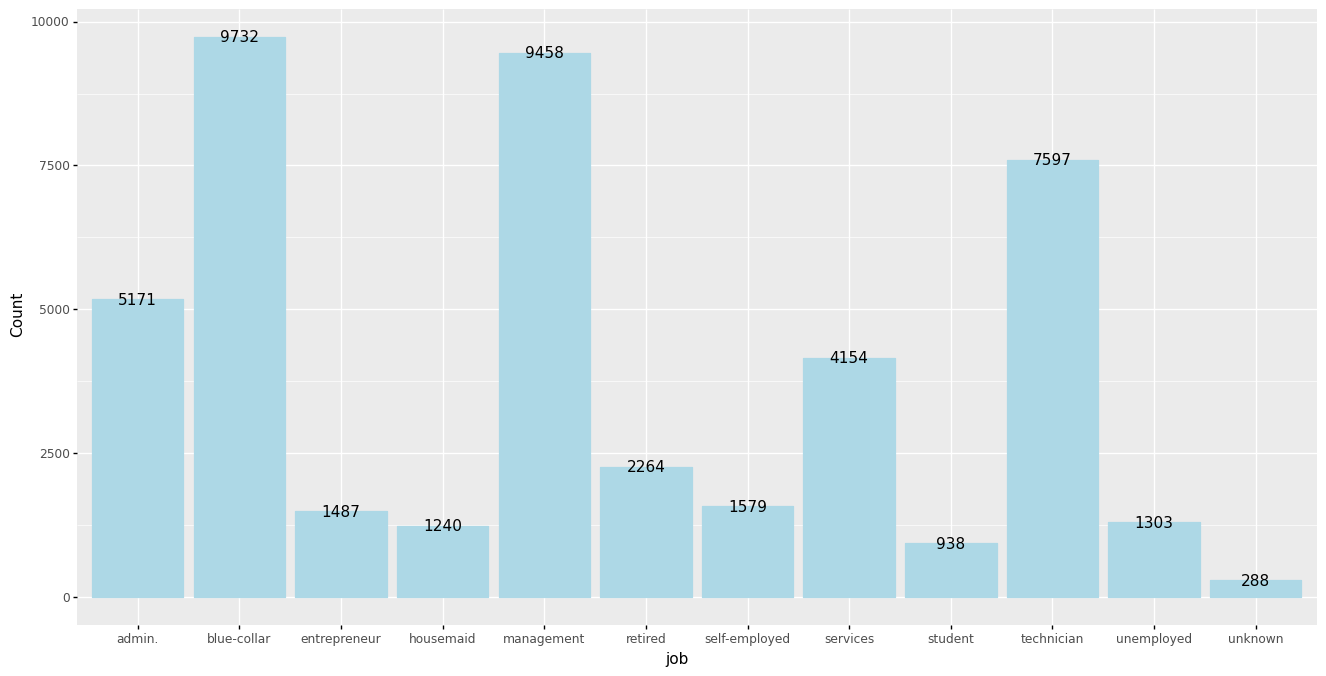

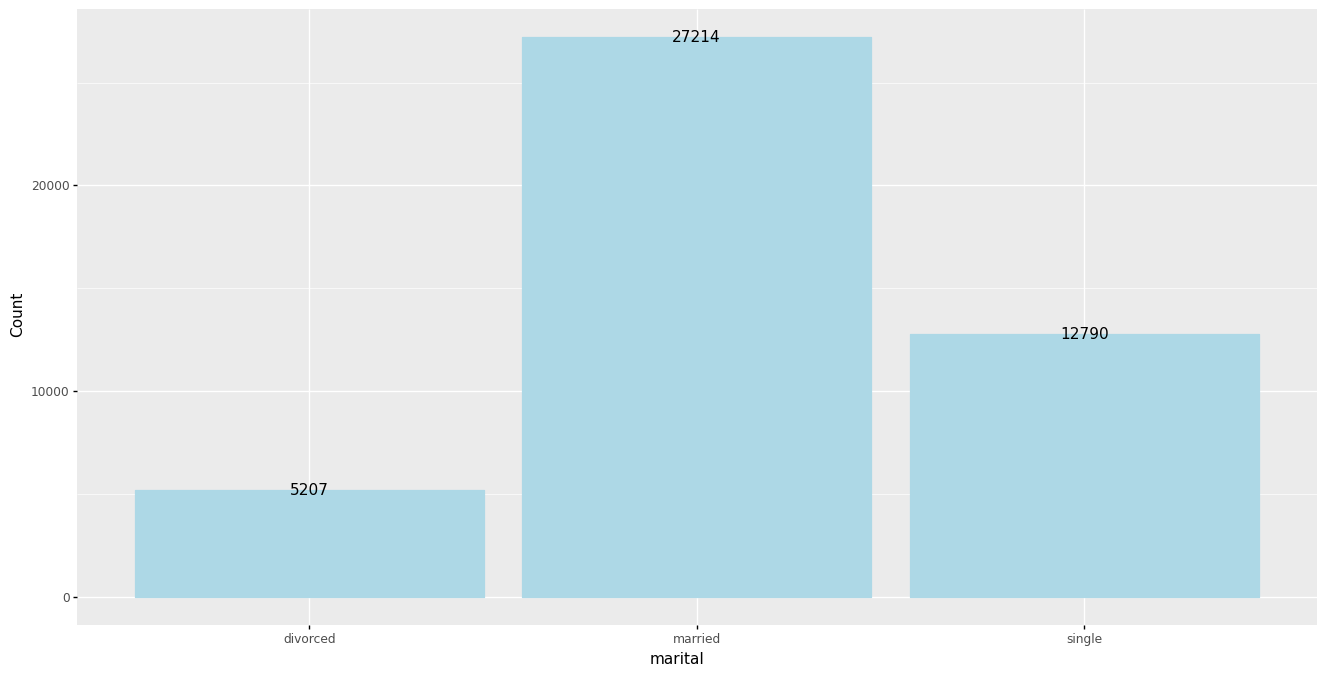

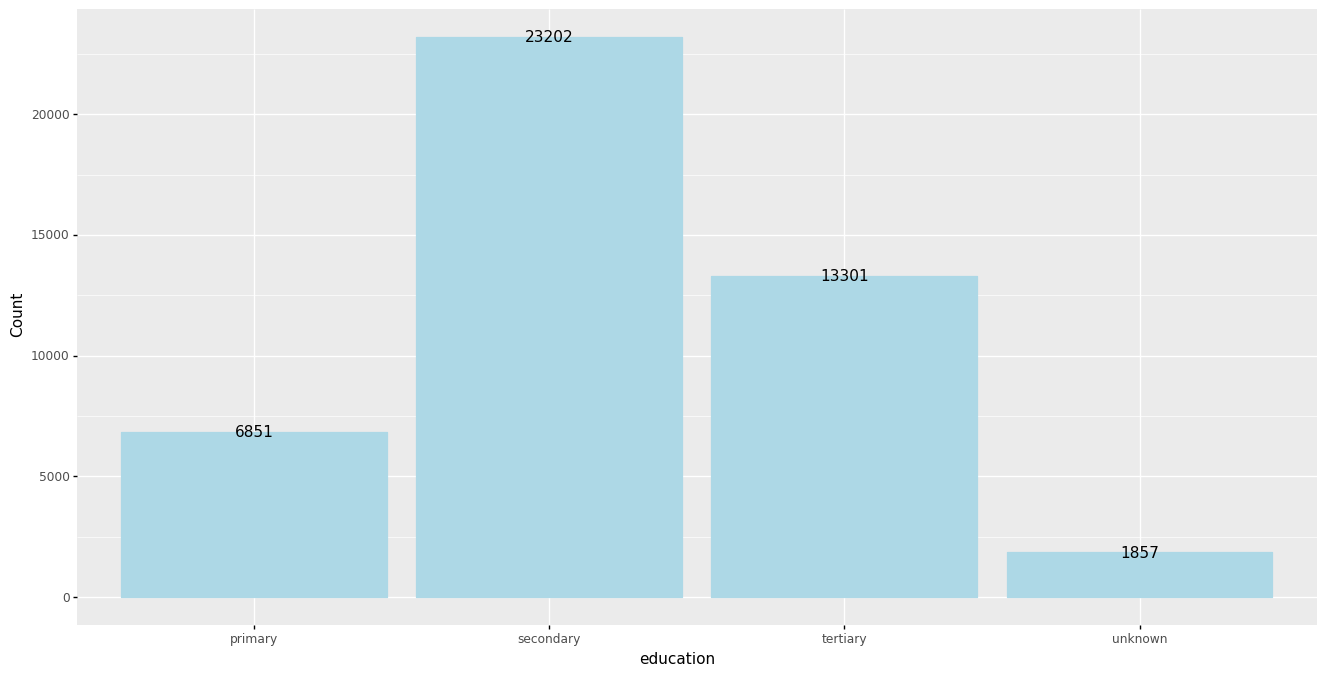

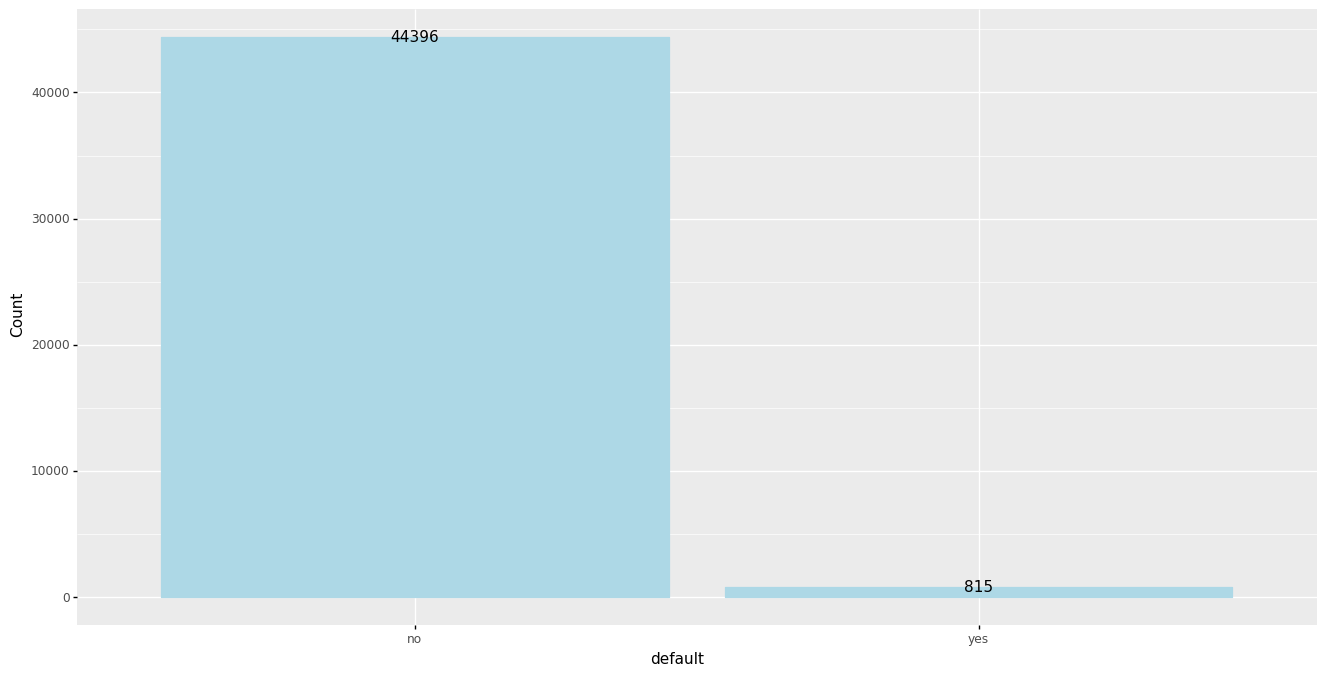

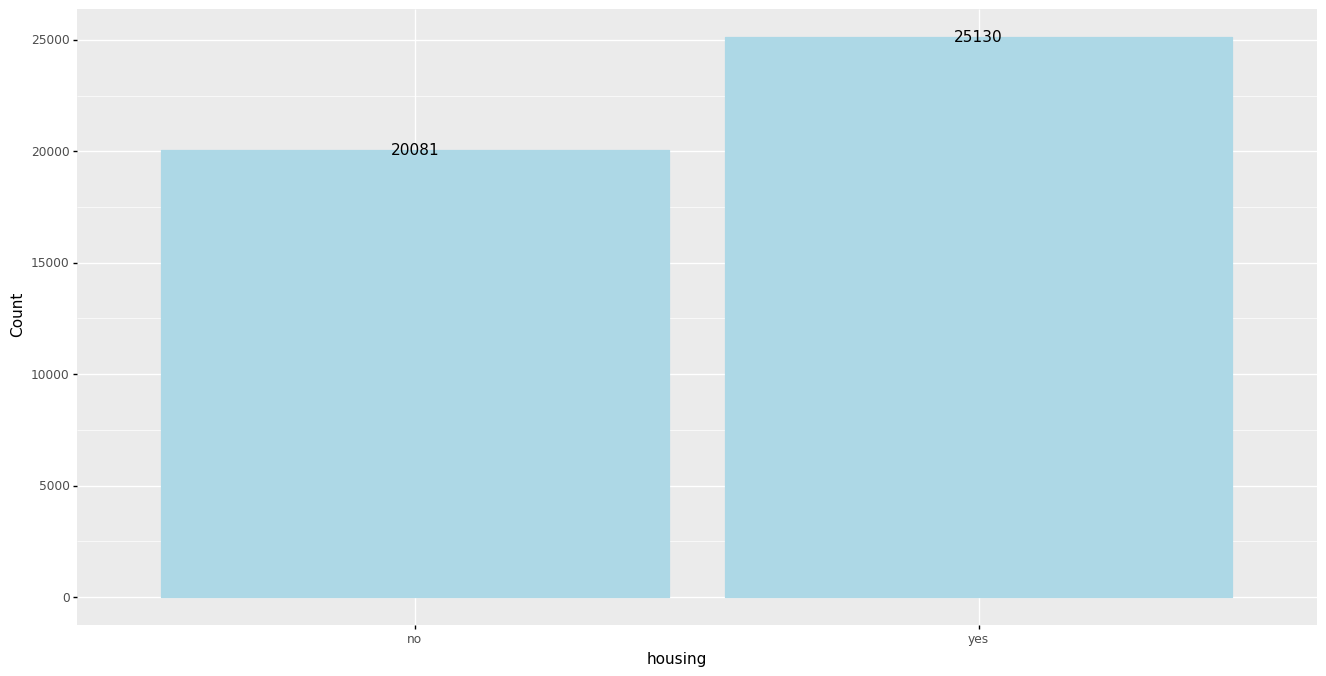

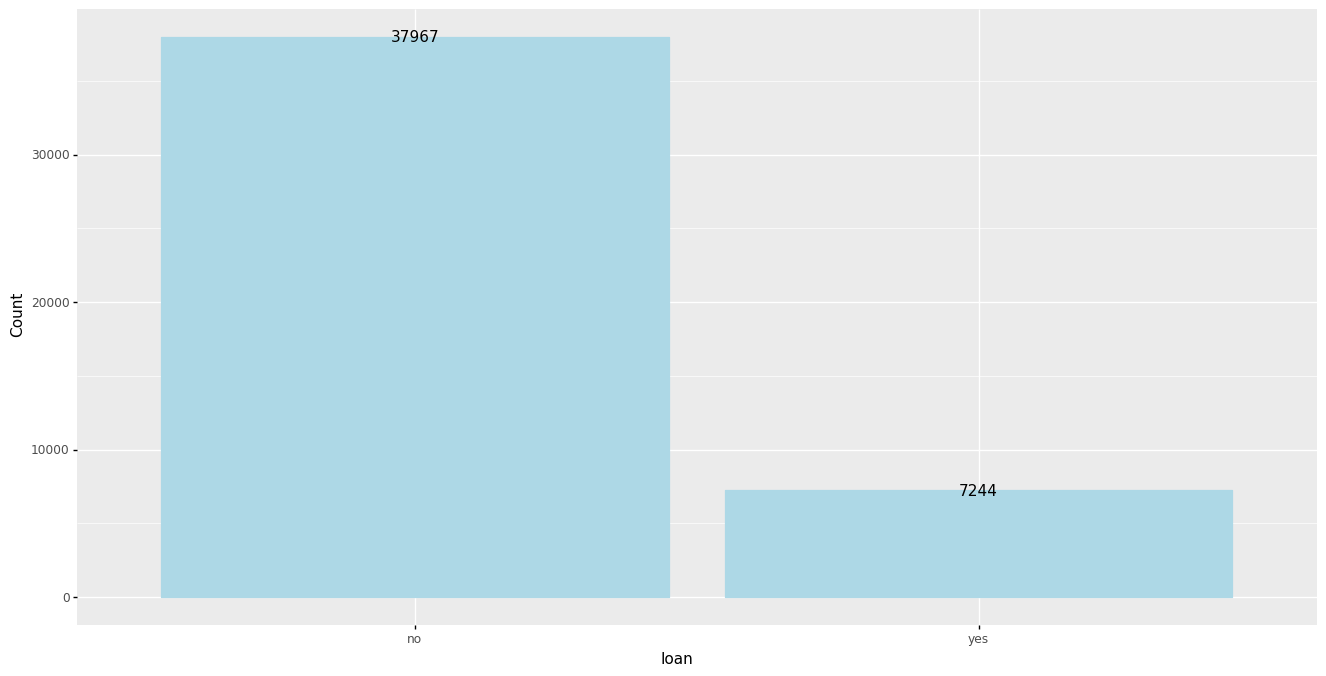

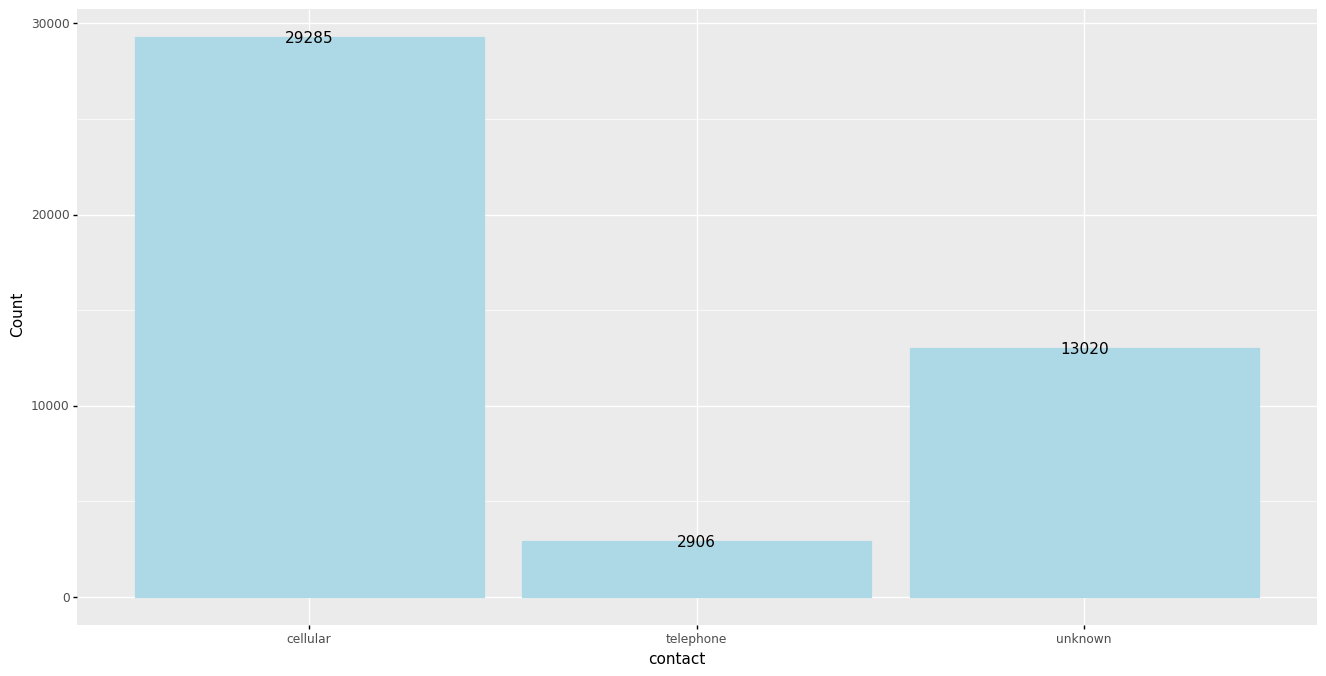

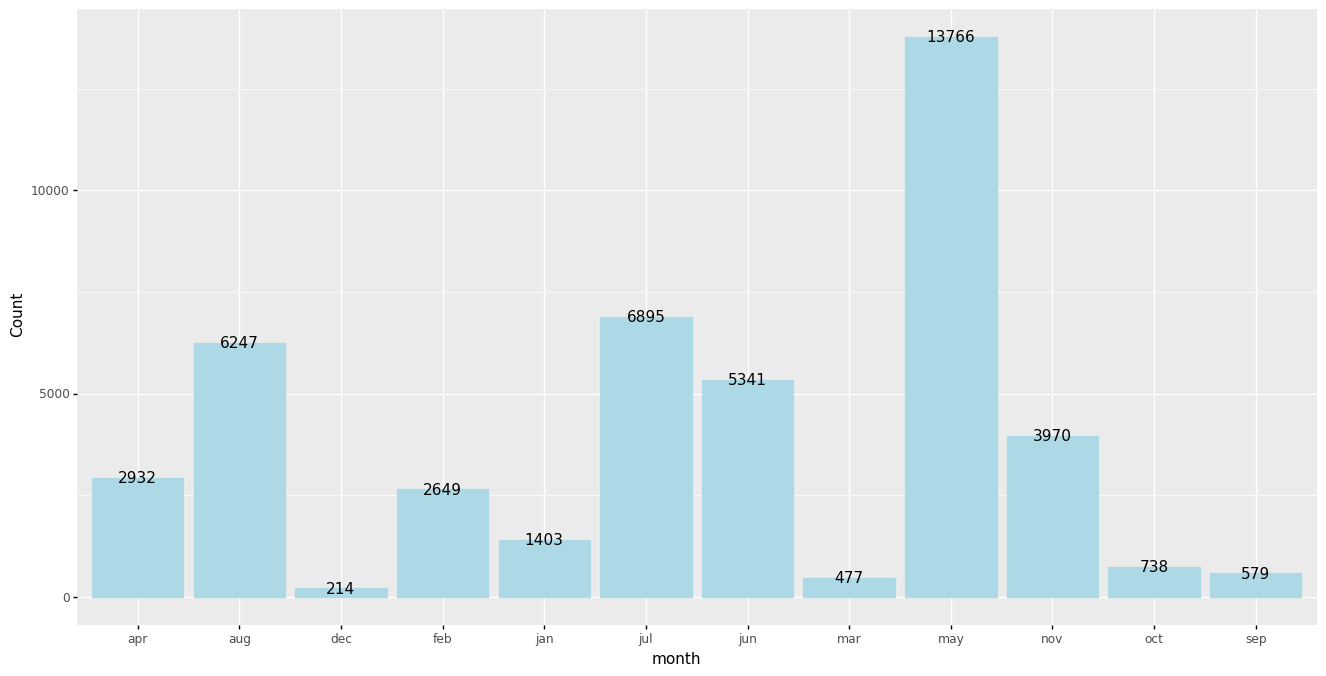

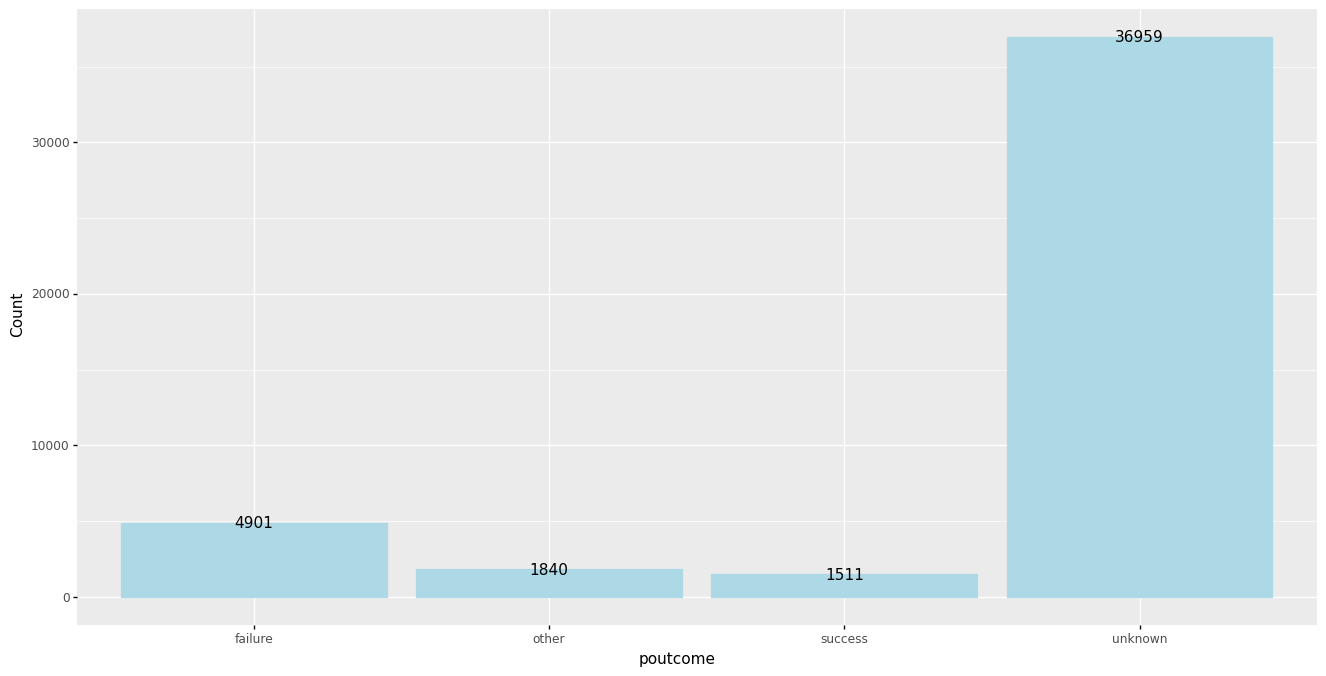

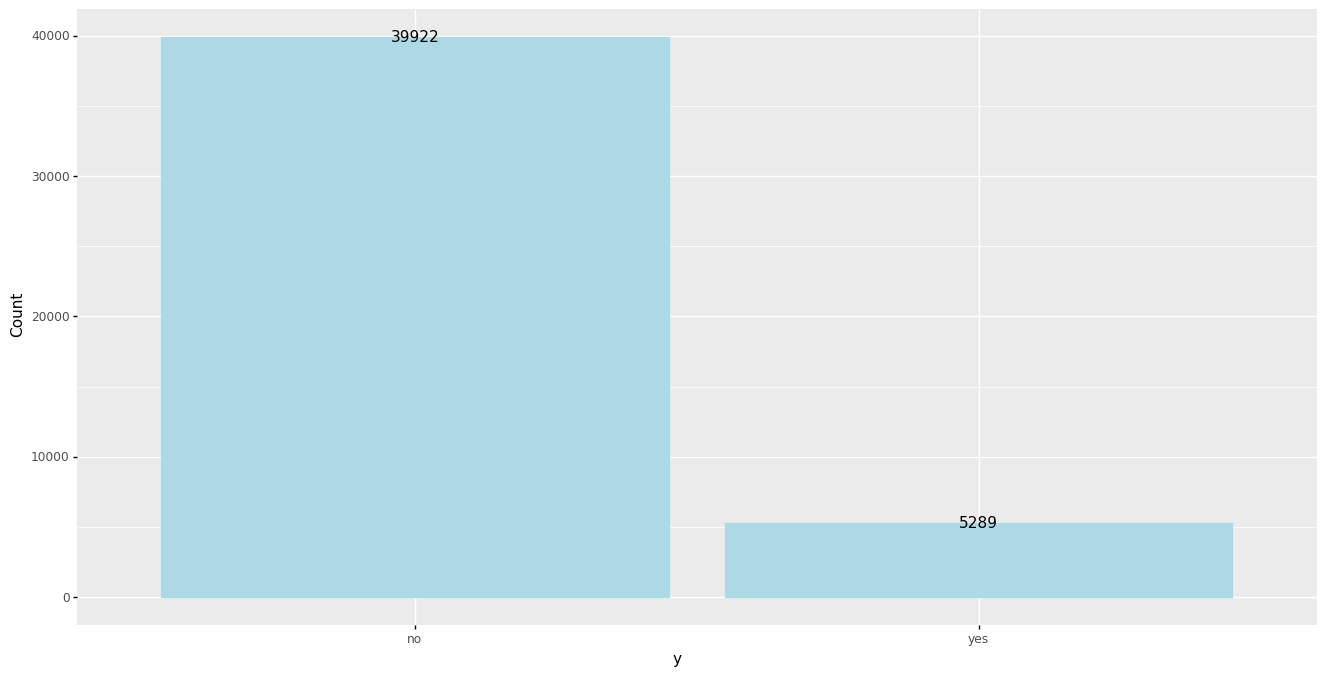

In [107]:
for i in cat_cols:
    plotnine.options.figure_size = (16, 8)
    print(ggplot(df,) + aes(x=i) + geom_bar(stat='count',color='lightblue',fill='lightblue') 
          + geom_text(aes(label = after_stat('count')), stat= "count") + labs(
            x=i,
            y="Count",
    ) ) 


In [60]:
# Vsisualize numerical data
num_cols = list(df.select_dtypes(include=['int64']))

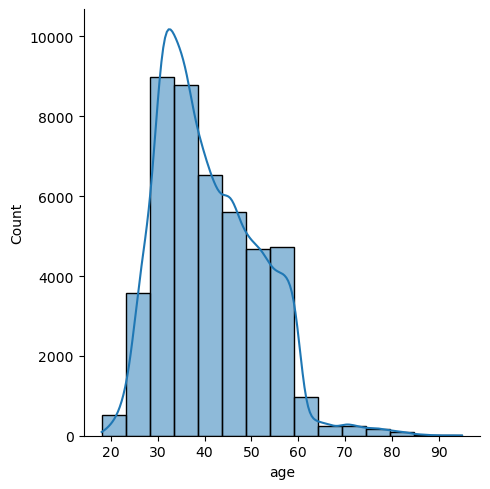

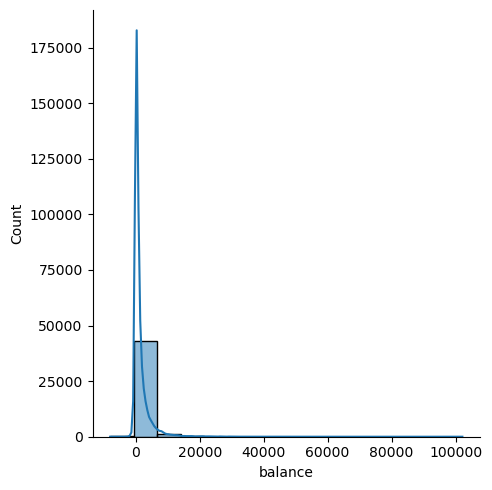

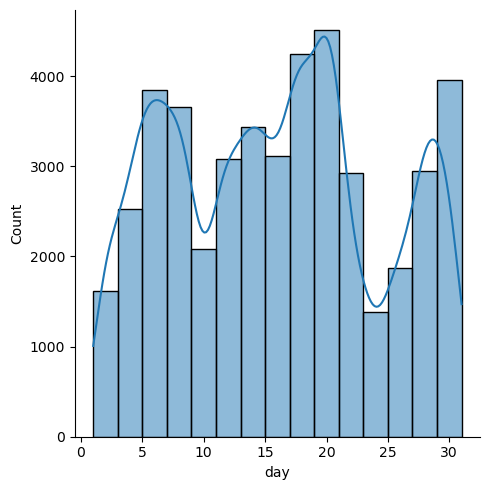

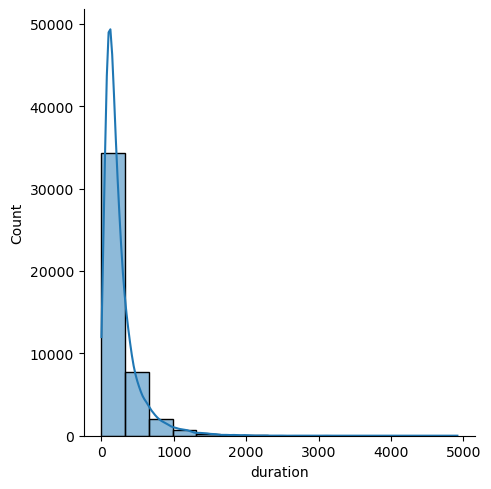

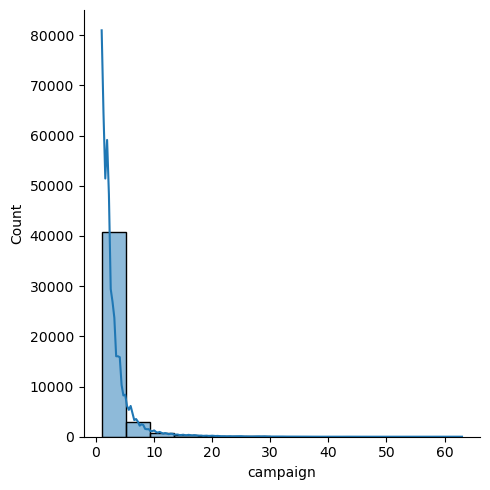

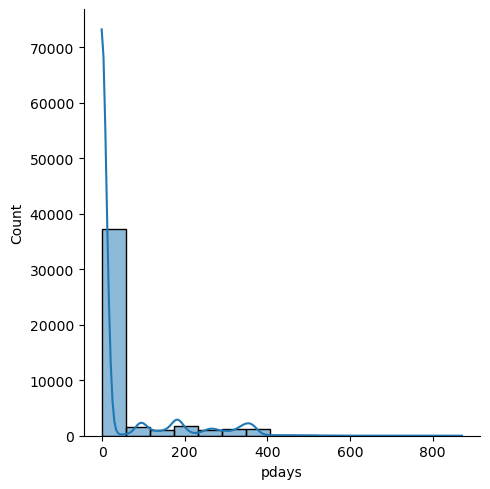

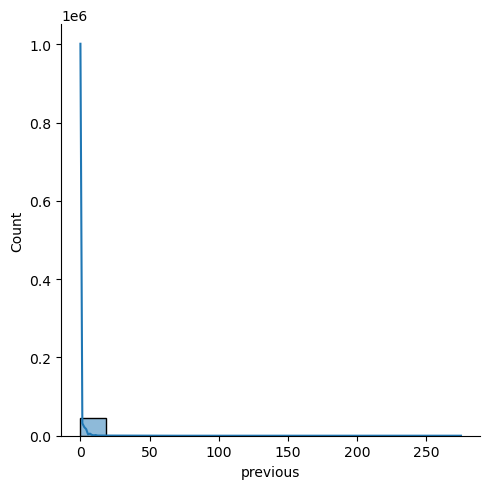

In [65]:
for i in num_cols:
    #create histogram with density curve overlaid
    sns.displot(df,x=i, kde=True, bins=15)
    plt.show()

### Data Preprocessing

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Convert label to numeric value
df['y'] = (df['y']!='no').astype(int)

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


#### Check For Missing Values

In [8]:
missing_val_count_by_column = (df.isnull().sum())
print("Missing values for columns:")
print(missing_val_count_by_column)
print()
print("Missing values in dataset:" ,missing_val_count_by_column.sum())

Missing values for columns:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Missing values in dataset: 0


#### Check for duplicate data

In [9]:
# check duplicates
print("\nDuplicate data count: " + str(df.duplicated().sum()))


Duplicate data count: 0


#### Handling Categorical Data

In [10]:
# label encoding for categorical data
labelencoder = LabelEncoder()

def cat_encoding(_col):
    return labelencoder.fit_transform(df[col])

In [11]:
for col in cat_cols:
    df[col] = cat_encoding(col)

In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


#### Check Correlation of X and y

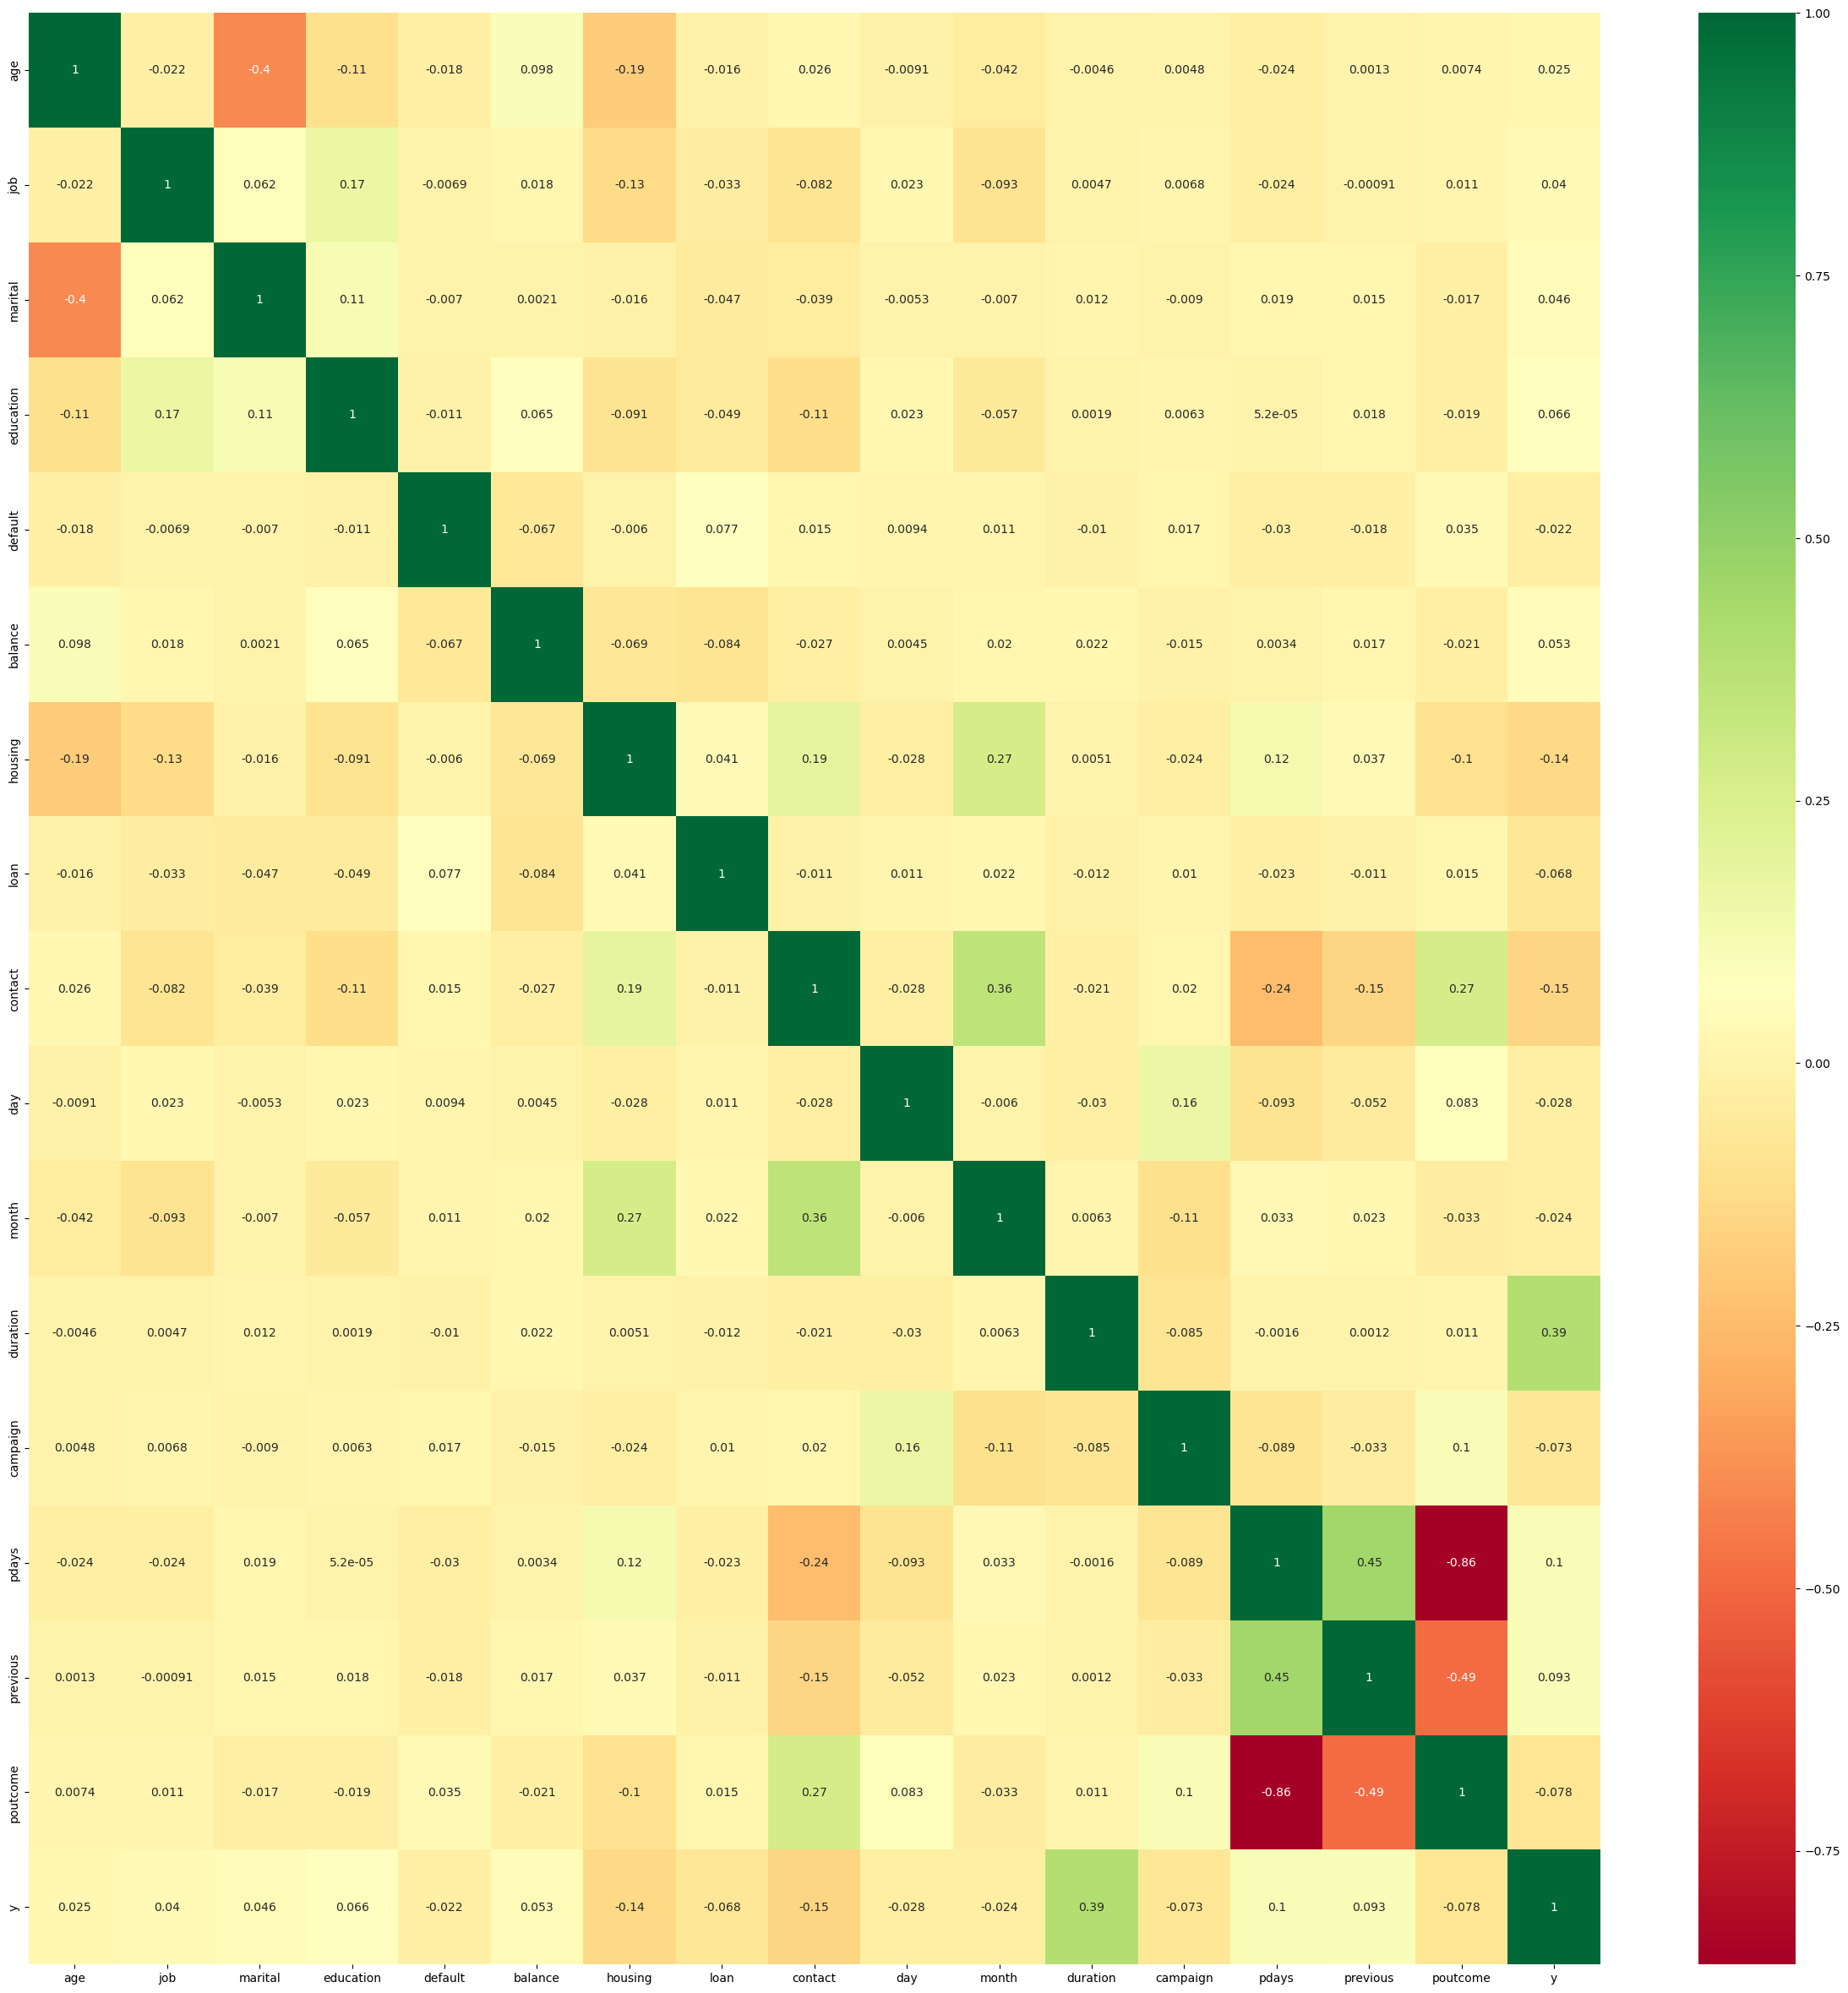

In [13]:
plt.figure(figsize = (30,30))
sb.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [14]:
# Since 'poutcome' and 'pday' is highly correlated with each other, 'poutcome' will be dropped since it's r is slightly less than 'pday'
cols_to_drop = ['poutcome','age']

df = df.drop(cols_to_drop, axis=1)

#### Split into dependent & independent variables

In [15]:
X = df.drop(['y'], axis=1)
y = pd.DataFrame(df.pop('y'),columns=['y'])

#### Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)


#### Data Normalization

In [17]:
# # create scaler
# scaler = StandardScaler()
# cols_to_scale = ['age','balance','duration']

# # fit scaler to training and testing data
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=cols_to_scale)

# print(X_train_scaled.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

#### Model Implementation & Evaluation

In [18]:
# Import Model
import lightgbm as lgb
from xgboost import XGBClassifier

lbgm = lgb.LGBMClassifier()
xgboost = XGBClassifier()

In [19]:
from mlxtend.plotting import plot_confusion_matrix
 
def model_evaluation(_model):
  _model.fit(X_train,y_train.values.ravel())
  train_pred = _model.predict(X_train)
  test_pred = _model.predict(X_test)
  # detects the col header got detected also in y_test
  print(set(y_test) - set(test_pred))
  print("Accuracy train: ",accuracy_score(y_train,train_pred))
  print("Accuracy test: ",accuracy_score(y_test,test_pred))
  
  # forcing the model to ignore the {'diagnosis'} column name as it disrupts the score calculationr
  print("Precision:",precision_score(y_test,test_pred,average='weighted', labels=np.unique(test_pred)))
  print("Recall:",recall_score(y_test,test_pred,average='weighted', labels=np.unique(test_pred)))
  print("F1 score:",f1_score(y_test,test_pred,average='weighted', labels=np.unique(test_pred)))
    
  # confusion matrix
  confusion = confusion_matrix(y_test, test_pred)
  fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(6, 6), )
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print(confusion)

LightBGM 

{'y'}
Accuracy train:  0.928140898031409
Accuracy test:  0.9018024991706293
Precision: 0.8921234274006073
Recall: 0.9018024991706293
F1 score: 0.8951560460809335


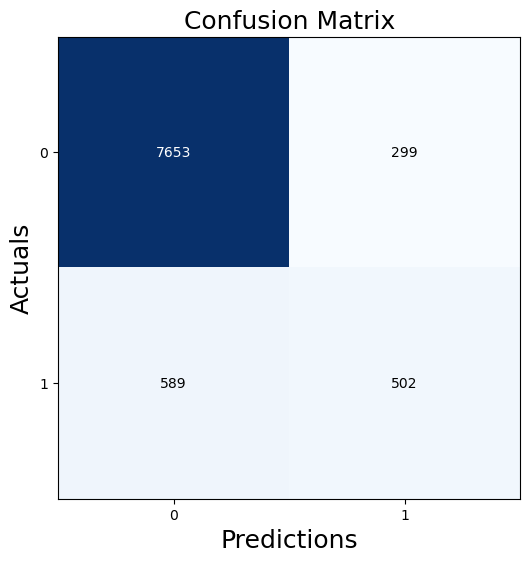

[[7653  299]
 [ 589  502]]

XGBoost 

{'y'}
Accuracy train:  0.9487668657376687
Accuracy test:  0.9043459029083268
Precision: 0.896584618217898
Recall: 0.9043459029083268
F1 score: 0.8993188200480382


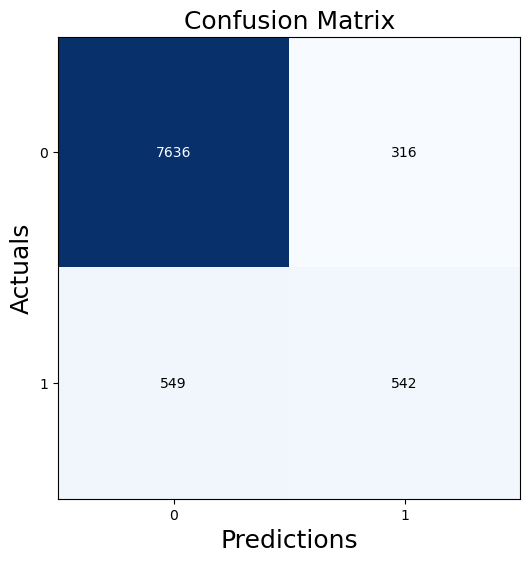

[[7636  316]
 [ 549  542]]



In [20]:
models = [lgbm, xgboost]
model_name = ['LightBGM','XGBoost']

for i in range(len(models)):
  print(model_name[i],'\n')
  model_evaluation(models[i])
  print()

#### Feature Importance


In [114]:
for i,v in enumerate(lbgm.feature_importances_):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 150.00000
Feature: 1, Score: 65.00000
Feature: 2, Score: 80.00000
Feature: 3, Score: 9.00000
Feature: 4, Score: 410.00000
Feature: 5, Score: 92.00000
Feature: 6, Score: 28.00000
Feature: 7, Score: 106.00000
Feature: 8, Score: 418.00000
Feature: 9, Score: 561.00000
Feature: 10, Score: 534.00000
Feature: 11, Score: 135.00000
Feature: 12, Score: 351.00000
Feature: 13, Score: 61.00000


In [108]:
for i,v in enumerate(xgboost.feature_importances_):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02662
Feature: 1, Score: 0.02928
Feature: 2, Score: 0.02879
Feature: 3, Score: 0.02495
Feature: 4, Score: 0.02960
Feature: 5, Score: 0.17662
Feature: 6, Score: 0.09294
Feature: 7, Score: 0.15922
Feature: 8, Score: 0.04235
Feature: 9, Score: 0.09256
Feature: 10, Score: 0.13946
Feature: 11, Score: 0.03806
Feature: 12, Score: 0.08159
Feature: 13, Score: 0.03797


In [21]:
xgboost.save_model('model.json')